# Ánalise dos dados Semanais do último ano do Fundo Imobiliário do Iguatemi

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [24]:
base = pd.read_csv('Dados IGTA3 1 ano- Semanal.csv')
base.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,IGTA3,Date,Close
2,NaN,NaN,10/01/2020 16:56:00,"54,74"
3,NaN,NaN,17/01/2020 16:56:00,"55,5"
4,NaN,NaN,24/01/2020 16:56:00,"54,9"


In [25]:
base = base.iloc[2:,2:]
base.columns = ["Date", "Close"]
base.head()

,Date,Close
2,10/01/2020 16:56:00,"54,74"
3,17/01/2020 16:56:00,"55,5"
4,24/01/2020 16:56:00,"54,9"
5,31/01/2020 16:56:00,"53,3"
6,07/02/2020 16:56:00,"53,77"


In [26]:
# Temos que transformaresses objetos em valores de verdade.
from datetime import datetime
date_parser = lambda date: datetime.strptime(date.split(' ')[0], '%d/%m/%Y')
base.Date = base.Date.map(date_parser)

# Agora ao valor em Reais
base.Close = base.Close.replace(',', '.', regex=True).astype(float)

In [27]:
base.index = base.Date
base.drop(['Date'], axis=1, inplace=True)
base.head()

,Close
Date,
2020-01-10,54.74
2020-01-17,55.50
2020-01-24,54.90
2020-01-31,53.30
2020-02-07,53.77


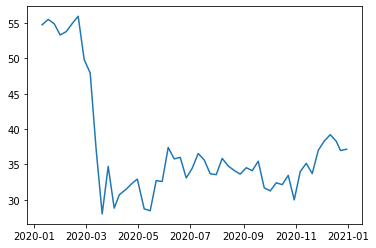

In [28]:
plt.plot(base)

In [32]:
model = ARIMA(base, order=(5,1,0), freq=base.index.inferred_freq)
model_fit = model.fit()
model_fit.summary()

/home/sena/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/sena/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   51
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -127.951
Method:                       css-mle   S.D. of innovations              2.967
Date:                Mon, 04 Jan 2021   AIC                            269.902
Time:                        21:39:03   BIC                            283.425
Sample:                             1   HQIC                           275.069
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3406      0.461     -0.739      0.460      -1.244       0.563
ar.L1.D.Close    -0.0153      0.138     -0.111      0.912      -0.285       0.255
ar.L2.D.Close     0.0942      0.135      0.697      0.486      -0.171       0.359
ar.L3.D.Close     0.0842      0.134      0.630      0.529      -0.178       0.346
ar.L4.D.Close    -0.1681      0.132     -1.270      0.204      -0.428       0.091
ar.L5.D.Close     0.1087      0.135      0.807      0.419      -0.155       0.373
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0005           -0.8468j            1.3107           -0.3882
AR.2           -1.0005           +0.8468j            1.3107            0.3882
AR.3            0.8839           -1.4925j            1.7347           -0.1649
AR.4            0.8839           +1.4925j            1.7347            0.1649
AR.5            1.7797           -0.0000j            1.7797           -0.0000
-----------------------------------------------------------------------------
"""

In [52]:
base.loc['2020-05']

,Close
Date,
2020-05-08,28.72
2020-05-15,28.45
2020-05-22,32.71
2020-05-29,32.59


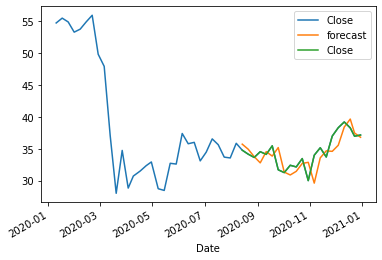

In [58]:
# Criação do eixo para a séria temporal e adicionar a partir do mopdel esse eixo.
eixo = base.plot()
# Plot insample faz ir aos dados originais
model_fit.plot_predict('2020-08-14', '2020-12-30', ax = eixo, plot_insample= True)
plt.show()

In [43]:
# AGora com AutoArima
auto_model = auto_arima(base, m=12, seasonal=True, trace=False)

auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   52
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -127.995
Date:                              Mon, 04 Jan 2021   AIC                            259.990
Time:                                      21:42:41   BIC                            263.854
Sample:                                           0   HQIC                           261.466
                                               - 52                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.5713      0.229     -2.494      0.013      -1.020      -0.122
sigma2         8.0792      1.720      4.697      0.000       4.708      11.451
===================================================================================
Ljung-Box (L1) (Q):                   1.38   Jarque-Bera (JB):                11.20
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
# Vamos fazer de acordo com o auto_arima
model = ARIMA(base, order=(0,1,0), freq=base.index.inferred_freq)
model_fit = model.fit()
model_fit.summary()

/home/sena/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/sena/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   51
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -129.659
Method:                           css   S.D. of innovations              3.075
Date:                Mon, 04 Jan 2021   AIC                            263.319
Time:                        21:49:09   BIC                            267.182
Sample:                             1   HQIC                           264.795
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3449      0.431     -0.801      0.423      -1.189       0.499
==============================================================================
"""

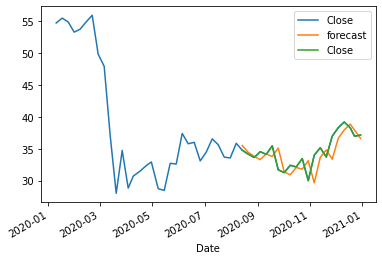

In [62]:
# Criação do eixo para a séria temporal e adicionar a partir do mopdel esse eixo.
eixo = base.plot()
# Plot insample faz ir aos dados originais
model_fit.plot_predict('2020-08-14', '2020-12-30', ax = eixo, plot_insample= True)
plt.show()

In [71]:
auto_model.predict(4)

array([37.78319632, 37.70188797, 38.90640228, 36.71427333])